In [32]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sc.settings.set_figure_params(dpi_save=300, frameon=False)
plt.rcParams['figure.figsize'] = (5, 5)

%load_ext autoreload
%config InlineBackend.figure_formats = ['pdf']
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import os
print(os.path.expanduser('~'))

/home/icb/carlo.dedonno


In [22]:
adata_ref = sc.read('../datasets/scpoli_m1_ref.h5ad')
adata_q = sc.read('../datasets/scpoli_m1_q.h5ad')

In [23]:
adata_q

AnnData object with n_obs × n_vars = 305638 × 25
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Class', 'Subclass', 'RNA_cluster', 'Cross_species', 'species'
    uns: 'Class_colors', 'Subclass_colors', 'neighbors', 'pca', 'species_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

/home/icb/carlo.dedonno/anaconda3/envs/scarches/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


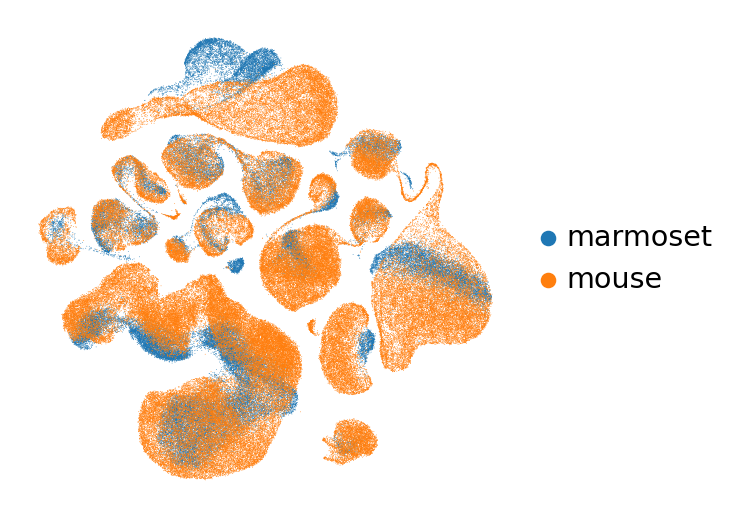

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sc.pl.umap(adata_ref, color='species', size=0.5, show=False, frameon=False, ax=ax)
ax.set_title('')
plt.savefig('pdfs/cross_species_ref.pdf', bbox_inches='tight')

/home/icb/carlo.dedonno/anaconda3/envs/scarches/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


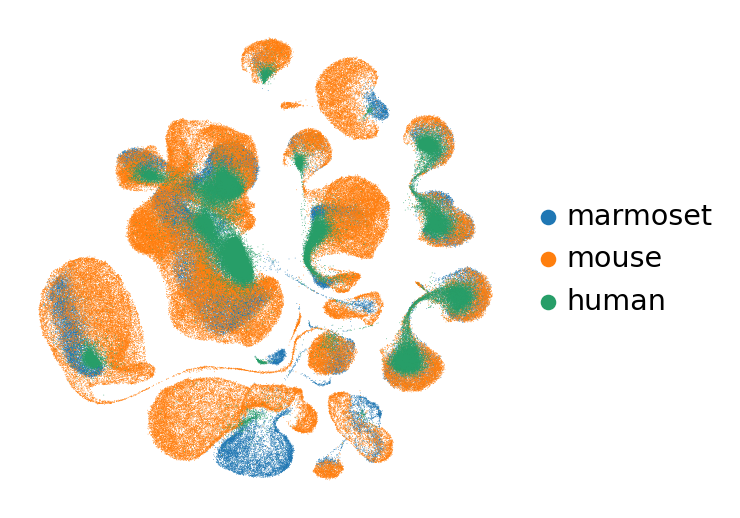

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
adata_q.obs.species = adata_q.obs.species.cat.reorder_categories(['marmoset', 'mouse', 'human'])
sc.pl.umap(adata_q, color='species', size=0.5, show=False, frameon=False, ax=ax)
ax.set_title('')
plt.savefig('pdfs/cross_species.pdf', bbox_inches='tight')

/home/icb/carlo.dedonno/anaconda3/envs/scarches/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


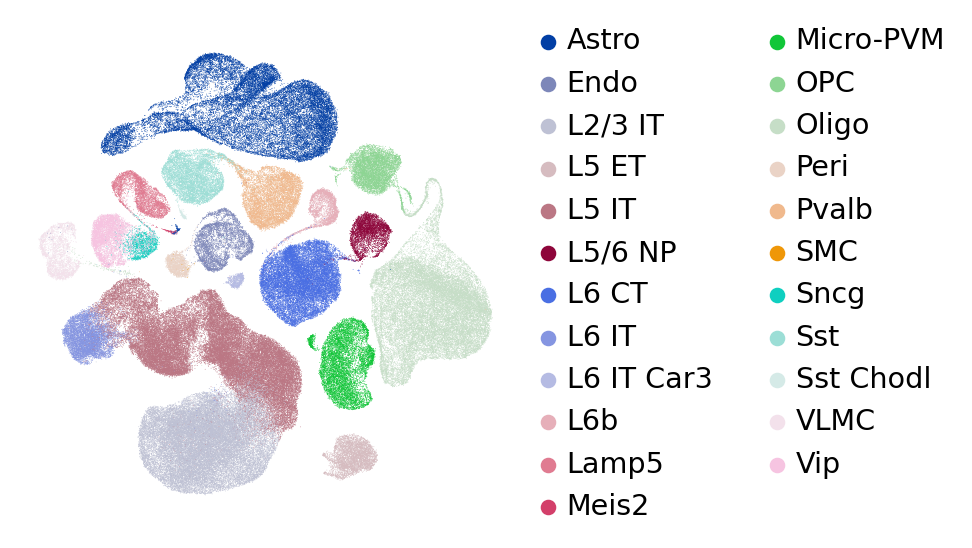

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sc.pl.umap(adata_ref, color='Subclass', size=0.5, show=False, frameon=False, ax=ax)
ax.set_title('')
plt.savefig('pdfs/cross_celltype_ref.pdf', bbox_inches='tight')

In [56]:
palette_dict

{'Astro': '#023fa5',
 'Endo': '#7d87b9',
 'L2/3 IT': '#bec1d4',
 'L5 ET': '#d6bcc0',
 'L5 IT': '#bb7784',
 'L5/6 NP': '#8e063b',
 'L6 CT': '#4a6fe3',
 'L6 IT': '#8595e1',
 'L6 IT Car3': '#b5bbe3',
 'L6b': '#e6afb9',
 'Lamp5': '#e07b91',
 'Meis2': '#d33f6a',
 'Micro-PVM': '#11c638',
 'OPC': '#8dd593',
 'Oligo': '#c6dec7',
 'Peri': '#ead3c6',
 'Pvalb': '#f0b98d',
 'SMC': '#ef9708',
 'Sncg': '#0fcfc0',
 'Sst': '#9cded6',
 'Sst Chodl': '#d5eae7',
 'VLMC': '#f3e1eb',
 'Vip': '#f6c4e1'}

/home/icb/carlo.dedonno/anaconda3/envs/scarches/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(
/home/icb/carlo.dedonno/anaconda3/envs/scarches/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/home/icb/carlo.dedonno/anaconda3/envs/scarches/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


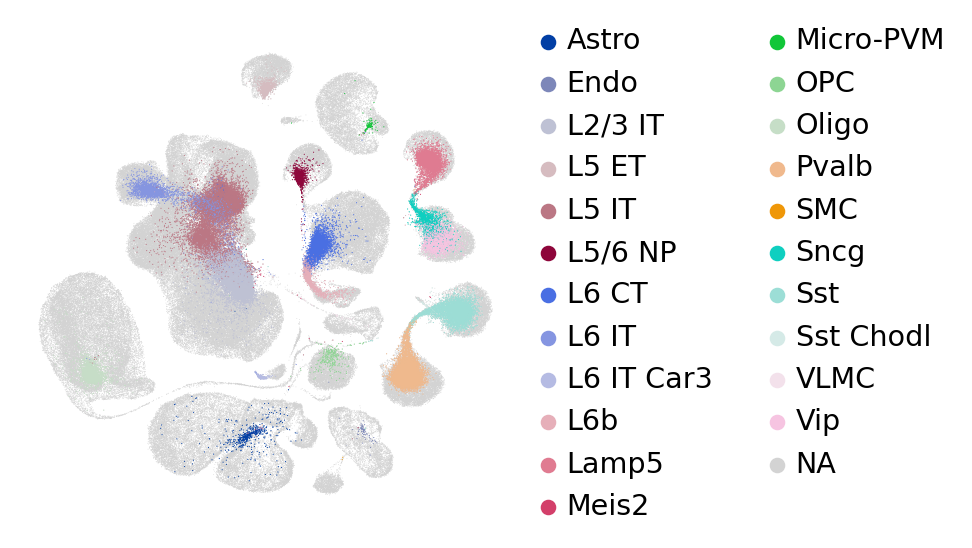

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
palette_dict = dict(
    zip(adata_ref.obs['Subclass'].cat.categories, 
        adata_ref.uns['Subclass_colors']))
sc.pl.umap(adata_q, size=0.5, show=False, frameon=False, ax=ax)
sc.pl.umap(adata_q[adata_q.obs.species == 'human'], color='pred', palette=palette_dict, size=1, show=False, frameon=False, ax=ax)
ax.set_title('')
plt.savefig('pdfs/cross_celltype_q.pdf', bbox_inches='tight')

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sc.pl.umap(adata_q, color='Subclass', size=0.5, show=False, frameon=False, ax=ax)
ax.set_title('')

/home/icb/carlo.dedonno/anaconda3/envs/scarches/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


Text(0.5, 1.0, '')

<Figure size 1200x1200 with 1 Axes>

In [44]:
def plot_classification_results(adata_obs, annotation_col, result_col):
    ct_ordered = list(sorted(adata_obs[annotation_col].unique()))
    plot_df = adata_obs[[annotation_col, result_col]].copy()
    
    plot_df['Annotations'] = plot_df[annotation_col]
    plot_df['status'] = plot_df[result_col].map({'Correct': 'Correct', 'Incorrect': 'Incorrect'})
    
    total_n_per_ct = plot_df['Annotations'].value_counts()
    total_n_per_ct["Overall"] = plot_df.shape[0]

    perc_correct = (pd.crosstab(plot_df['Annotations'], plot_df['status']).loc[ct_ordered, :])
    perc_correct.loc["Overall", :] = (
        plot_df['status'].value_counts() / total_n_per_ct["Overall"] * 100
    )
    perc_correct = perc_correct.div(perc_correct.sum(axis=1), axis="rows") * 100
    
    with plt.rc_context(
        {
            "figure.figsize": (0.4 * len(perc_correct), 3),
            "axes.spines.right": False,
            "axes.spines.top": False,
        }
    ):
        fig, ax = plt.subplots()
        perc_correct.plot(kind="bar", stacked=True, ax=ax)
        handles, labels = ax.get_legend_handles_labels()
        
        ax.legend(handles[::-1], labels[::-1], loc=(1.01, 0.60), frameon=False)

        plt.xticks(
            ticks=range(len(ct_ordered) + 1),
            labels=[f"{ct} ({total_n_per_ct[ct]})" for ct in ct_ordered + ["Overall"]],
        )
        ax.set_ylabel("% of cells")
        plt.grid(False)
        plt.show()

In [48]:
classification_results = pd.read_csv(
    '/lustre/scratch/users/amirali.moinfar/scpoli_m1_classification_results.h5ad',
    index_col=[0]
)

In [57]:
adata_q.obs['pred'] = adata_q.obs['Subclass'].copy()
adata_q.obs['pred'][adata_q.obs['species'] == 'human'] = classification_results['pred']

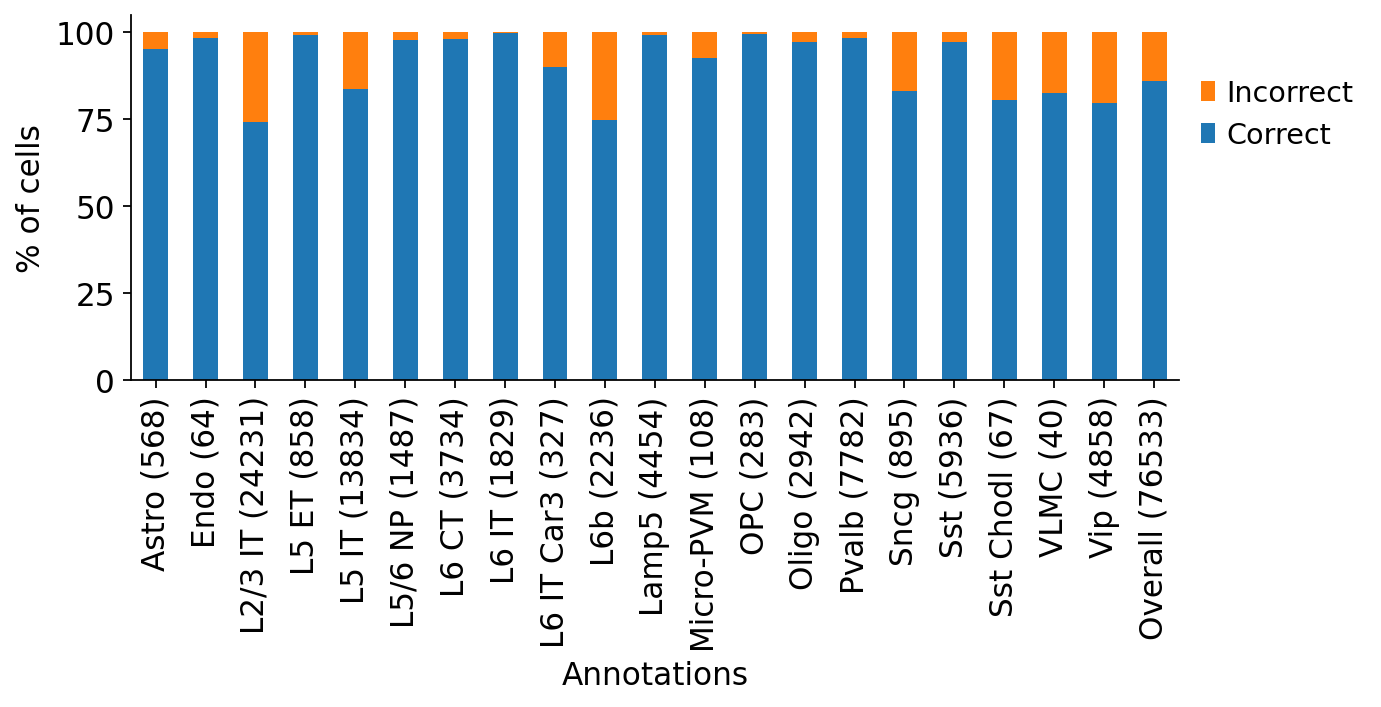

In [53]:
plot_classification_results(classification_results, 'true', 'result')